<a href="https://colab.research.google.com/github/KUSHAL67F4/OIBSIP/blob/main/Oasis_Infobyte_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('Unemployment.csv')

In [92]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [23]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [24]:
data.shape

(754, 7)

In [26]:
print("Number of rows:", data.shape[0])

Number of rows: 754


In [27]:
print("Number of Columns:", data.shape[1])

Number of Columns: 7


In [93]:

data = data.drop(['Date', 'Frequency'], axis=1)
data = data.dropna()
data_encoded = pd.get_dummies(data)


features = data_encoded.drop('Estimated Unemployment Rate', axis=1)
target = data_encoded['Estimated Unemployment Rate']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



In [6]:
#Overall Unemployed Count
overall_employed_count = data['Estimated Employed'].sum()
overall_labor_participation_rate = data['Estimated Labour Participation Rate'].mean()

overall_unemployed_count = overall_employed_count * (1 - overall_labor_participation_rate)

print("Overall Estimated Unemployed Count:", overall_unemployed_count)

Overall Estimated Unemployed Count: -221942684844.37234


In [75]:
#Overall Labour Participation Rate
overall_labor_participation_rate = data['Estimated Labour Participation Rate'].mean()
print("Overall Estimated Labor Participation Rate:", overall_labor_participation_rate)

Overall Estimated Labor Participation Rate: 42.630121621621626


In [77]:
#Overall Unemployment Region Wise
data['Estimated Unemployed'] = data['Estimated Employed'] * (1 - (data['Estimated Labour Participation Rate'] / 100))
overall_unemployment_region_wise = data.groupby('Region')['Estimated Unemployed'].sum()

print("Overall Estimated Unemployment Region-wise:")
print(overall_unemployment_region_wise)

Overall Estimated Unemployment Region-wise:
Region
Andhra Pradesh      1.337232e+08
Assam               7.361122e+07
Bihar               2.133168e+08
Chandigarh          2.301638e+06
Chhattisgarh        6.858669e+07
Delhi               4.260682e+07
Goa                 3.283330e+06
Gujarat             1.680898e+08
Haryana             5.620131e+07
Himachal Pradesh    1.685360e+07
Jammu & Kashmir     2.235399e+07
Jharkhand           7.348464e+07
Karnataka           1.739935e+08
Kerala              7.936400e+07
Madhya Pradesh      1.887260e+08
Maharashtra         3.155064e+08
Meghalaya           7.135405e+06
Odisha              1.102123e+08
Puducherry          3.385538e+06
Punjab              7.332867e+07
Rajasthan           1.674850e+08
Sikkim              9.763116e+05
Tamil Nadu          1.952124e+08
Telangana           9.504867e+07
Tripura             7.481427e+06
Uttar Pradesh       4.781172e+08
Uttarakhand         2.446476e+07
West Bengal         2.582316e+08
Name: Estimated Unemploye

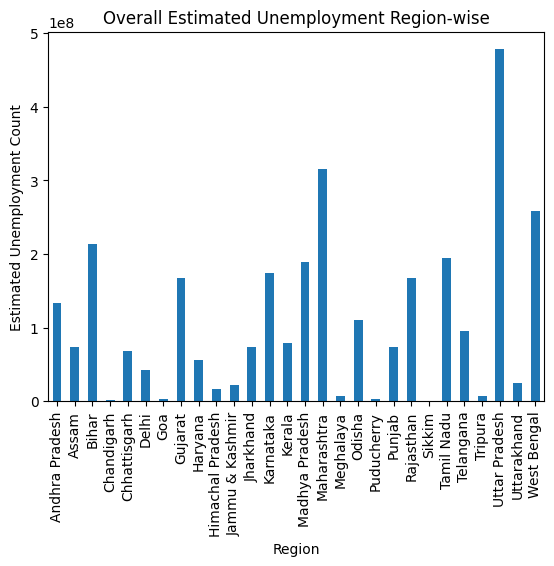

In [78]:
#Visualizing it
overall_unemployment_region_wise.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Count')
plt.title('Overall Estimated Unemployment Region-wise')
plt.show()

In [80]:
#Overall Unemployment Area Wise
data['Estimated Unemployed'] = (data['Estimated Employed'] * (100 - data['Estimated Labour Participation Rate'])) / 100
overall_unemployment_area_wise = data.groupby('Area')['Estimated Unemployed'].sum()
print("Overall Unermployment Area Wise is:", overall_unemployment_area_wise)

Overall Unermployment Area Wise is: Area
Rural    2.048065e+09
Urban    1.005017e+09
Name: Estimated Unemployed, dtype: float64


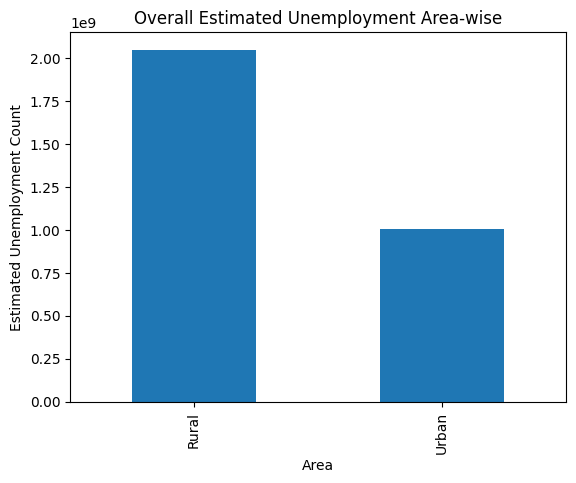

In [81]:
#Visualizing it
overall_unemployment_area_wise.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Count')
plt.title('Overall Estimated Unemployment Area-wise')
plt.show()

In [126]:
#Unemployment Per Month
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Month'] = data['Date'].dt.to_period('M')
data = data.drop(['Frequency', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'], axis=1)
data = data.dropna()


unemployment_monthly = data.groupby('Month')['Estimated Unemployment Rate'].mean()

print(unemployment_monthly)


Month
2019-05     8.874259
2019-06     9.303333
2019-07     9.033889
2019-08     9.637925
2019-09     9.051731
2019-10     9.900909
2019-11     9.868364
2019-12     9.497358
2020-01     9.950755
2020-02     9.964717
2020-03    10.700577
2020-04    23.641569
2020-05    24.875294
2020-06    11.903600
Freq: M, Name: Estimated Unemployment Rate, dtype: float64


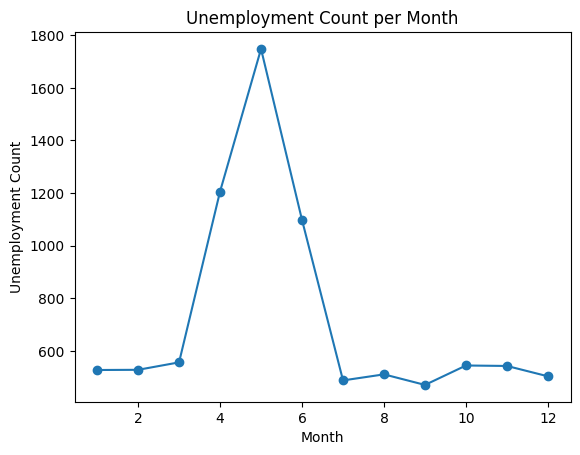

In [85]:
#Unemployment count per month
unemployment_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Count per Month')
plt.show()

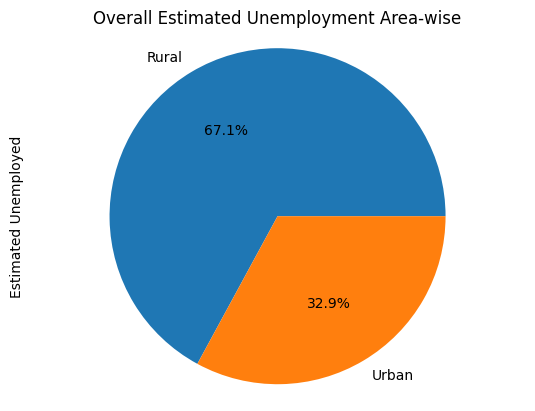

In [43]:
#Pie Chart of Overall Estimated Unemployment Area-wise

overall_unemployment_area_wise.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Estimated Unemployment Area-wise')
plt.axis('equal')
plt.show()

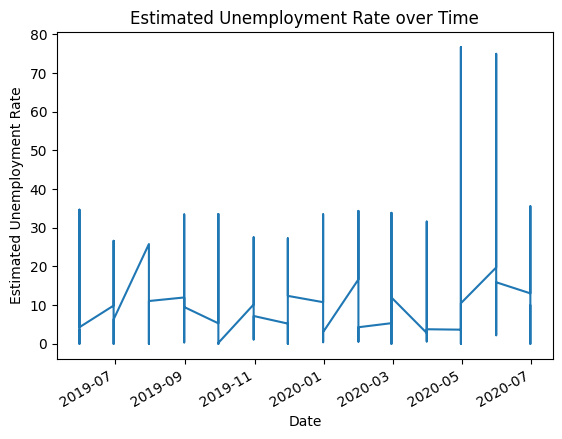

In [96]:
#Estimated Unemployment Rate Over Time
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
unemployment_rate_over_time = data['Estimated Unemployment Rate']
unemployment_rate_over_time.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate over Time')
plt.show()

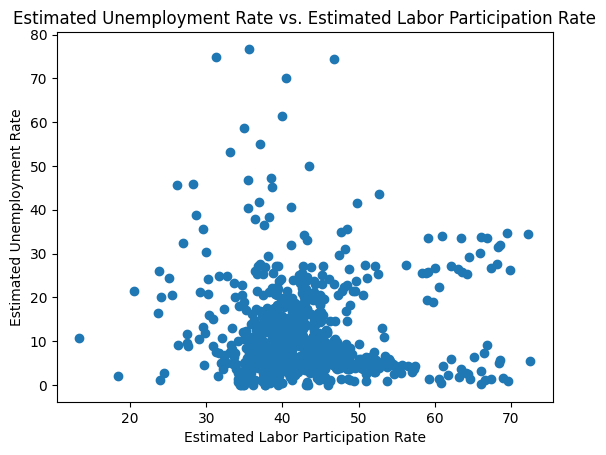

In [90]:
plt.scatter(data['Estimated Labour Participation Rate'], data['Estimated Unemployment Rate'])
plt.xlabel('Estimated Labor Participation Rate')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate vs. Estimated Labor Participation Rate')
plt.show()

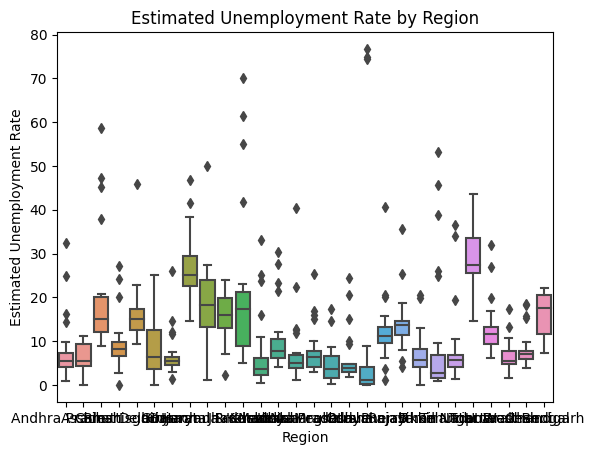

In [55]:
import seaborn as sns

sns.boxplot(x='Region', y='Estimated Unemployment Rate', data=data)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate by Region')
plt.show()

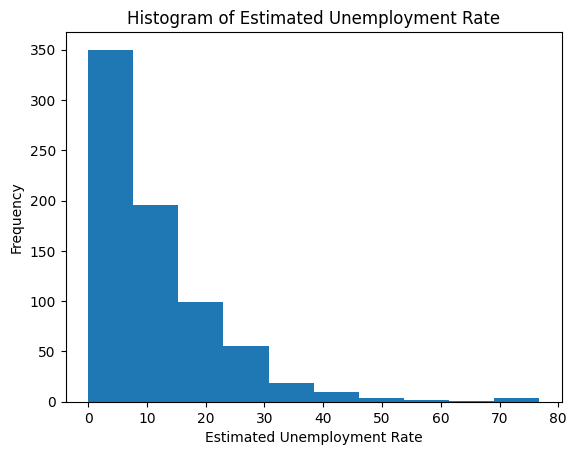

In [56]:
plt.hist(data['Estimated Unemployment Rate'], bins=10)
plt.xlabel('Estimated Unemployment Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Unemployment Rate')
plt.show()


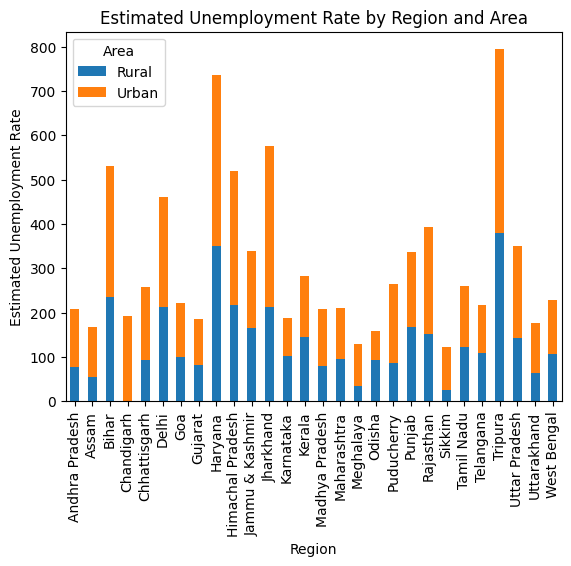

In [74]:
data_grouped = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate'].sum().unstack()
data_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate by Region and Area')
plt.legend(title='Area')
plt.show()

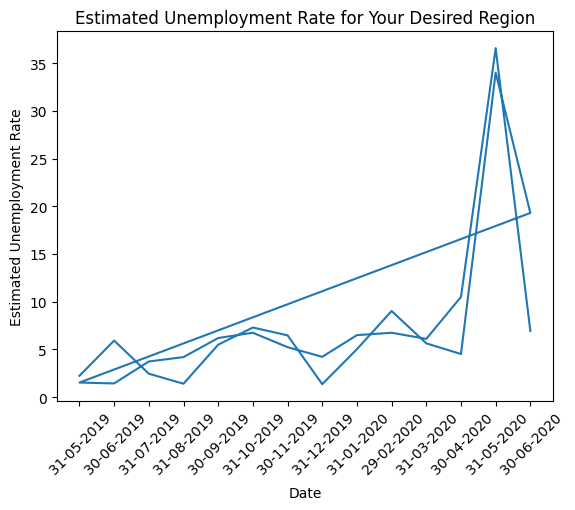

In [63]:
region_data = data[data['Region'] == 'Telangana']
plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate'])
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate for Your Desired Region')
plt.xticks(rotation=45)
plt.show()

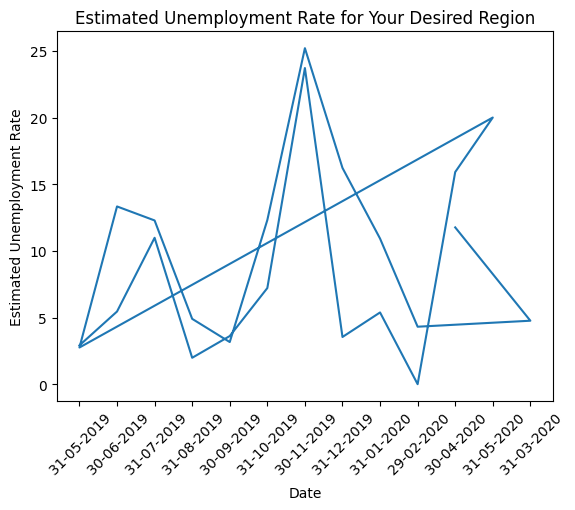

In [62]:
region_data = data[data['Region'] == 'Goa']
plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate'])
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate for Your Desired Region')
plt.xticks(rotation=45)
plt.show()

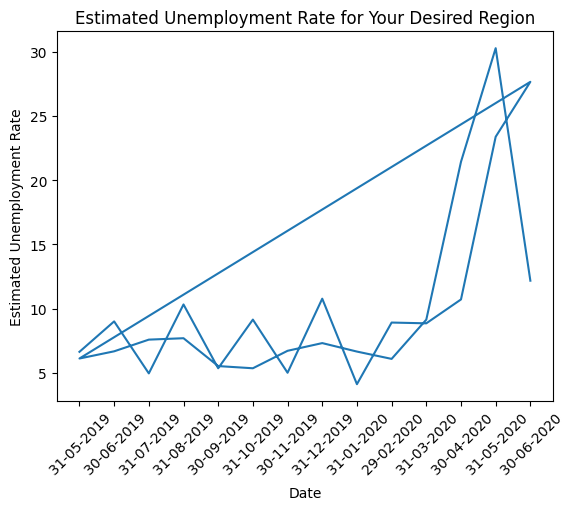

In [64]:
region_data = data[data['Region'] == 'Kerala']
plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate'])
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate for Your Desired Region')
plt.xticks(rotation=45)
plt.show()

<ipython-input-65-39040fbed8ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


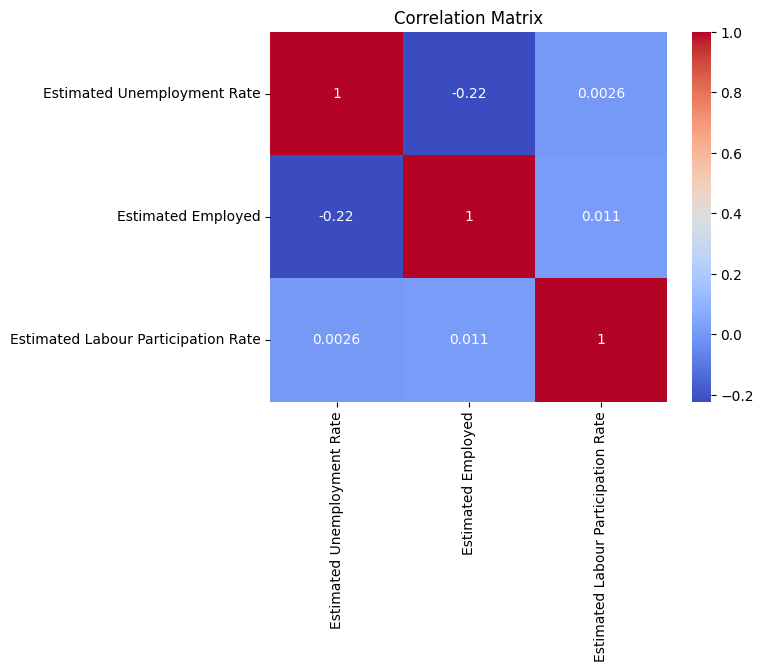

In [65]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

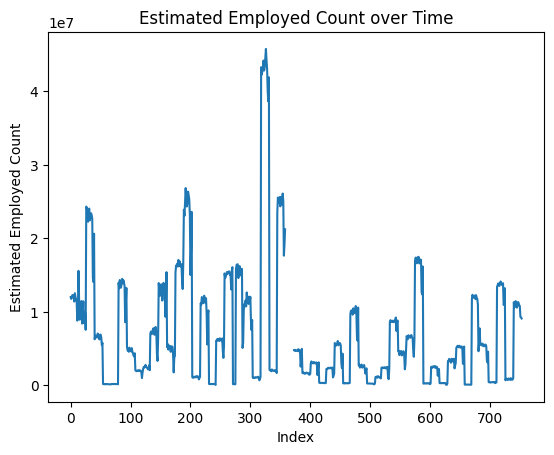

In [73]:
plt.plot(data['Estimated Employed'])
plt.xlabel('Index')
plt.ylabel('Estimated Employed Count')
plt.title('Estimated Employed Count over Time')
plt.show()

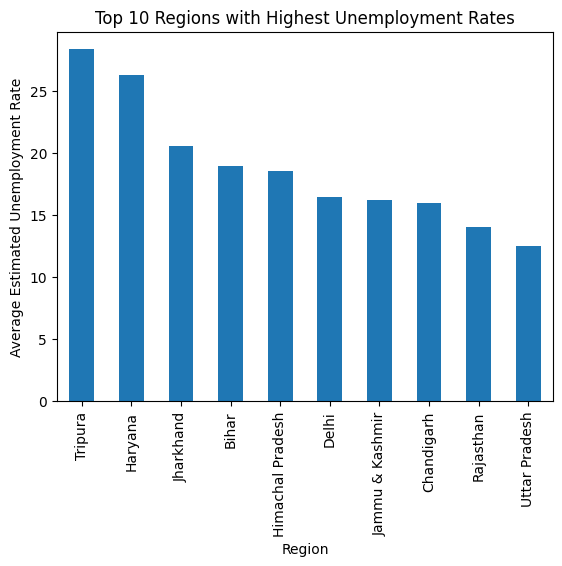

In [97]:
top_n = 10  # Specify the number of top regions to consider
top_regions = data.groupby('Region')['Estimated Unemployment Rate'].mean().nlargest(top_n)
top_regions.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate')
plt.title(f'Top {top_n} Regions with Highest Unemployment Rates')
plt.show()

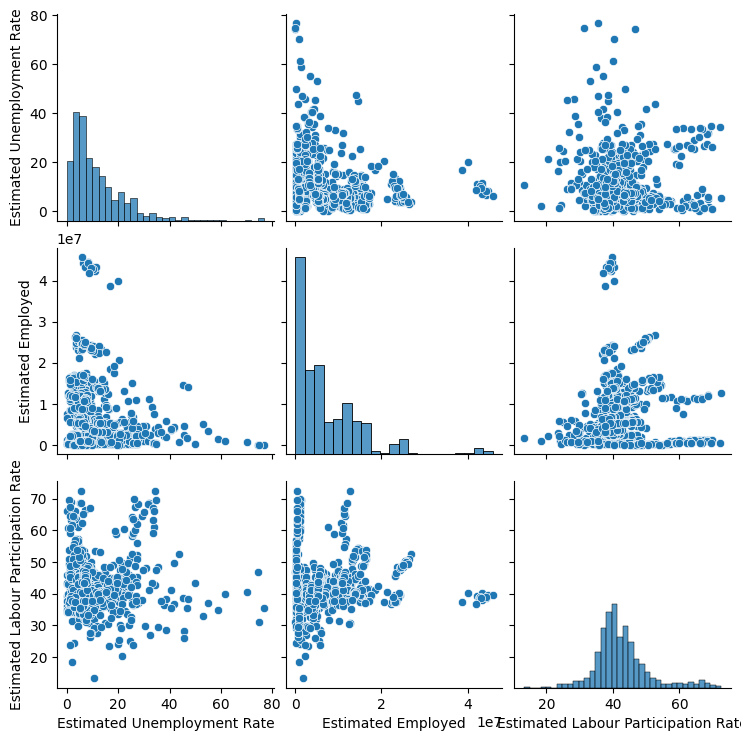

In [69]:
sns.pairplot(data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']])
plt.show()

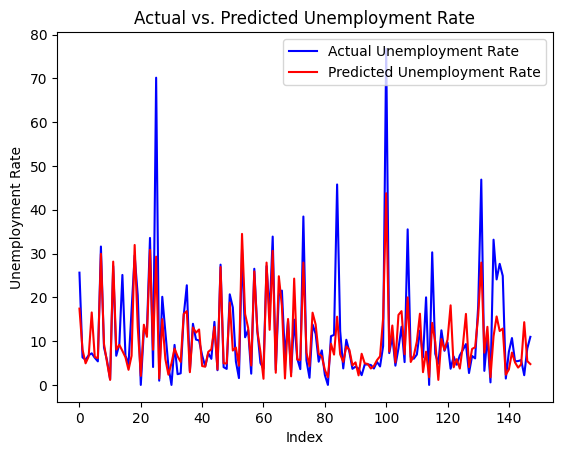

In [71]:
y_pred = model.predict(X_test)

# Step 8: Visualization
plt.plot(y_test.values, color='blue', label='Actual Unemployment Rate')
plt.plot(y_pred, color='red', label='Predicted Unemployment Rate')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs. Predicted Unemployment Rate')
plt.legend()
plt.show()